<a href="https://colab.research.google.com/github/cdcmx2020a/group_A_AlmaJair/blob/master/plot_pollutants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [3]:
rcp['font.size'] = 18.
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'

In [4]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 176 (delta 52), reused 161 (delta 47), pack-reused 0
Receiving objects: 100% (176/176), 40.98 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [6]:
# COVID cases
cases = np.loadtxt('/content/group_A_AlmaJair/datos_covid/diario_estado.csv', delimiter=',') # Loads cases file

In [7]:
time = cases[0, :]
time = np.ma.masked_invalid(time)

In [8]:
# Loads time mm,dd,yyyy HH,mm
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [9]:
time_final = np.ma.masked_equal(time_final, 0)

In [10]:
cases = np.ma.masked_invalid(cases) # Get rid of invalid values

In [11]:
# Check METADATA to see number and state
meta = open('/content/group_A_AlmaJair/datos_covid/metadata_diario_estado.txt','r').read() # Baja California is 2

In [13]:
meta = open('/content/group_A_AlmaJair/datos_covid/metadata_diario_estado.txt','r').read() # Baja California is 2

In [14]:
meta

'      \nAGUASCALIENTES 1     \nBAJA CALIFORNIA 2     \nBAJA CALIFORNIA SUR 3     \nCAMPECHE 4     \nCHIAPAS 7     \nCHIHUAHUA 8     \nDISTRITO FEDERAL 9     \nCOAHUILA 5     \nCOLIMA 6     \nDURANGO 10     \nGUANAJUATO 11     \nGUERRERO 12     \nHIDALGO 13     \nJALISCO 14     \nMEXICO 15     \nMICHOACAN 16     \nMORELOS 17     \nNAYARIT 18     \nNUEVO LEON 19     \nOAXACA 20     \nPUEBLA 21     \nQUERETARO 22     \nQUINTANA ROO 23     \nSAN LUIS POTOSI 24     \nSINALOA 25     \nSONORA 26     \nTABASCO 27     \nTAMAULIPAS 28     \nTLAXCALA 29     \nVERACRUZ 30     \nYUCATAN 31     \nZACATECAS 32     \nNacional 0     \n'

In [15]:
number_state = cases[:,0]
index = np.where(number_state == 15)[0][0]
print(index)

15


In [16]:
# Choose a state
cases_st = cases[index, :]

In [17]:
print(cases_st[3:].shape)
print(time_final[3:].shape)

(200,)
(200,)


(737425.0, 737669.0)

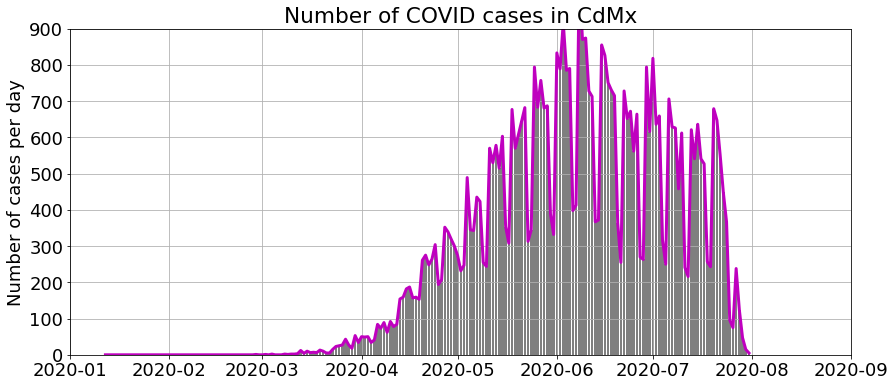

In [21]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Number of COVID cases in CdMx'
units = 'Number of cases per day'
ax.plot(num2date(time_final[1:]), cases_st[1:], lw=3, color='m')
ax.bar(time_final[1:], cases_st[1:], color='k', alpha=0.5)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 900)
ax.grid()
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
# plt.savefig('figuras/Figura_Estado_Baja_California.png', bbox_inches='tight')

In [24]:
# Now plot the number of pollutants

In [25]:
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/contaminantes_cdmx_2020.csv', delimiter=',') # Loads San Pedro pollutant file

In [26]:
# Loads time mm,dd,yyyy HH,mm
month = mat[:, 1]
day = mat[:, 0]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii] + 2000), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [27]:
year

array([20., 20., 20., ..., 20., 20., 20.])

In [28]:
# This depends on the file
o3 = np.ma.masked_invalid(mat[:, 5]) # 03 ppb 10 para Cadereyta
pm25 = np.ma.masked_invalid(mat[:, 6]) # pm2.5 kg/m3 11 para Cadereyta
temp = np.ma.masked_invalid(mat[:, 7]) # temperature C 12 para Cadereyta

In [29]:
lin2 = np.int(np.floor((o3.shape[0]/24)))
lin = np.int(o3.shape[0] - lin2 * 24)

In [30]:
lin2

170

In [31]:
# Take daily Maximum
time_day = np.reshape(time[:-lin], (lin2, 24)).mean(1)
o3_day = np.reshape(o3[:-lin], (lin2, 24)) 
pm25_day = np.reshape(pm25[:-lin], (lin2, 24))

In [32]:
# pm2.5 si tienes mas del 75% de los datos diarios se saca el promedio
# ozono si tienes mas del 75% de los datos diarios se saca el maximo diario

In [33]:
for ii in range(pm25_day.shape[0]):
  if (pm25_day[ii, ~pm25_day[ii, :].mask].size) < 18:
    pm25_day[ii, :] = np.ma.masked

In [34]:
for ii in range(o3_day.shape[0]):
  if (o3_day[ii, ~o3_day[ii, :].mask].size) < 18:
    o3_day[ii, :] = np.ma.masked
    print(ii)

35
36
167
168
169


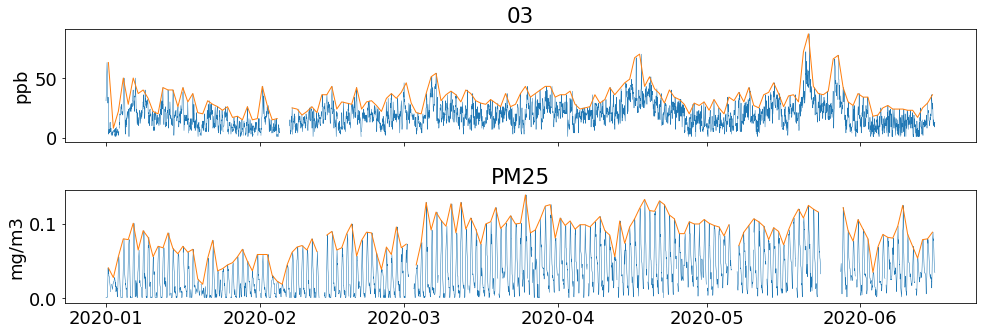

In [35]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time), o3, lw=0.5)
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = 'mg/m3'
ax.plot(num2date(time), pm25, lw=0.5)
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 80)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
plt.tight_layout()
# plt.savefig('pollutants_raw.png', bbox_inches='tight')

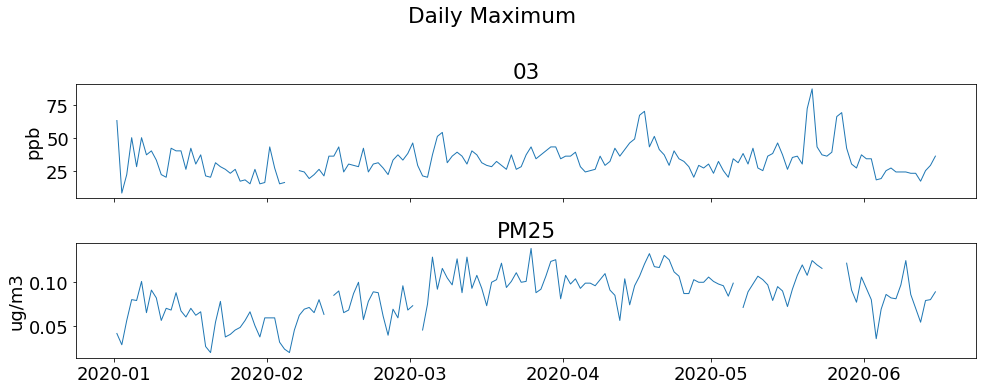

In [36]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = 'ug/m3'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Maximum', y=1.1)
plt.tight_layout()
plt.savefig('daily_max_pollutants.png', bbox_inches='tight')

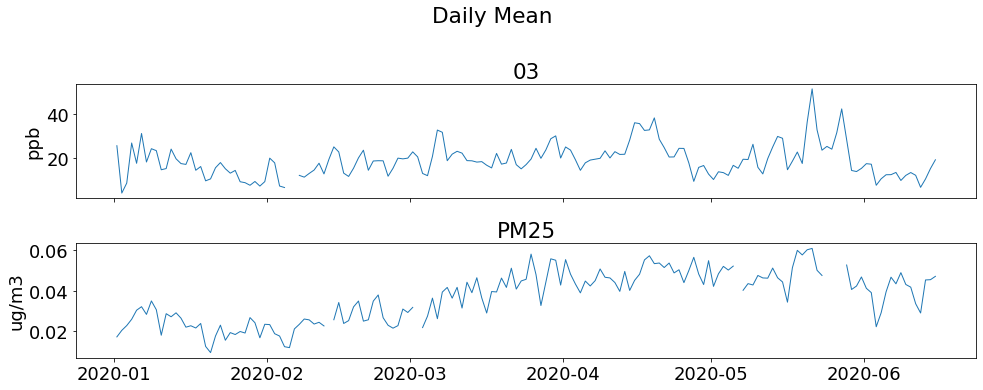

In [37]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = 'ug/m3'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Mean', y=1.1)
plt.tight_layout()
# plt.savefig('daily_mean_pollutants.png', bbox_inches='tight')

Text(0, 0.5, 'Temperature $^oC$')

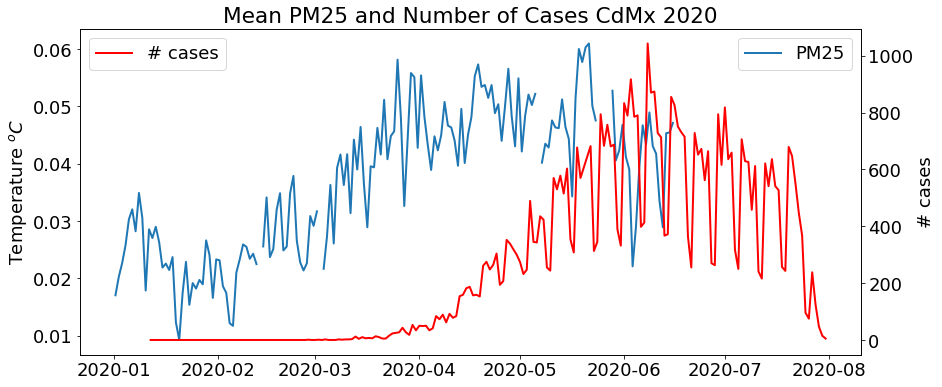

In [38]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean PM25 and Number of Cases CdMx 2020'
ax1 = ax
ax1.plot(num2date(time_day), pm25_day.mean(1), lw=2, label = 'PM25')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final[1:]), cases_st[1:], lw=2, color='r', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
# ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')